## Normalization
The data used in this notebook is lymphocyte data for one patient's B cells and T cells. Here we plot the runs to determine the need for normalization and test normalization techniques.

First, we import our loader module. This brings the functions defined there (in our repository at ~/load_data.py) into scope so we can use them in this script. Then we can load our data and store it as <code>data_raw</code>.

In [1]:
import load_data
data_raw = load_data.load_FragPipe()

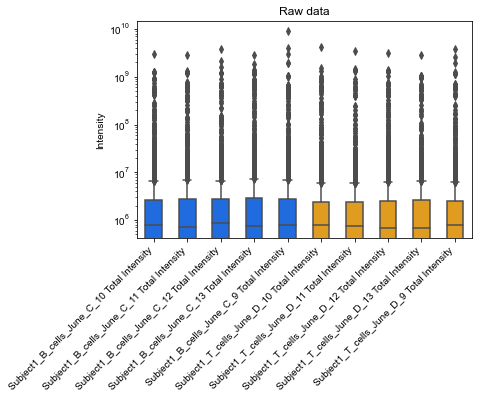

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Raw data")
colors = ["#0066ff","#0066ff","#0066ff","#0066ff","#0066ff","orange","orange","orange","orange", "orange"]
sns.set(font_scale=1.5)
figure = sns.boxplot(data=data_raw, width=.5, palette=colors)
figure.set_ylabel("Intensity")
figure.set_yscale("log")
plt.setp(figure.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show()

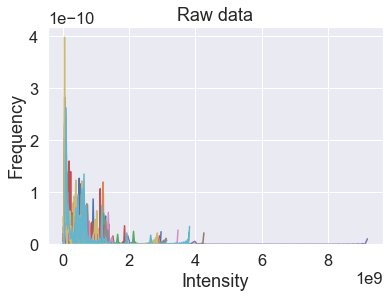

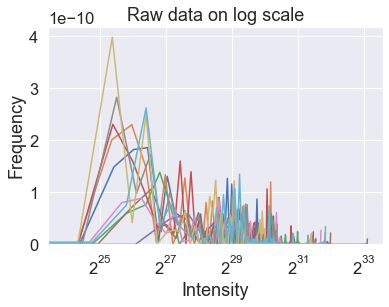

In [3]:
def dist(ser, log=False):
    f=sns.distplot(ser, hist=False)
    f.set_xlabel("Intensity")
    f.set_ylabel("Frequency")
    if log: f.set_xscale("log", basex=2)
    

plt.title("Raw data")
data_raw.apply(dist)
plt.show()
plt.title("Raw data on log scale")
data_raw.apply(dist, log=True)
plt.show()

Global median normalization
https://datascienceplus.com/proteomics-data-analysis-2-3-data-filtering-and-missing-value-imputation/

In [4]:
from numpy import nan
from numpy import log2
from statistics import median

In [5]:
data_log2 = log2(data_raw.replace(0,nan))
data_log2_medNorm = data_log2.apply(lambda series: series-median(series.dropna()))

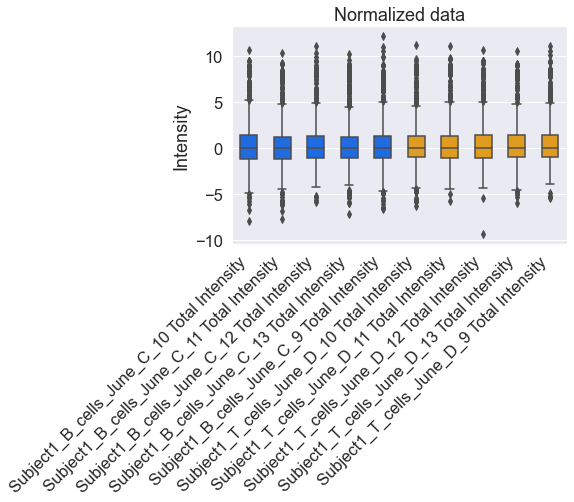

In [6]:

plt.title("Normalized data")
figure = sns.boxplot(data=data_log2_medNorm, width=.5, palette=colors)
figure.set_ylabel("Intensity")
plt.setp(figure.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show()

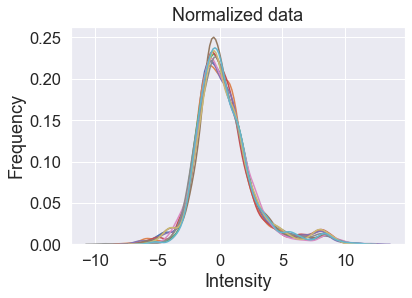

In [7]:

plt.title("Normalized data")
sns.set_style("white")
data_log2_medNorm.apply(dist)
plt.show()

The global median normalization works well with this data. The dataset is now log2 and scaled to zero.

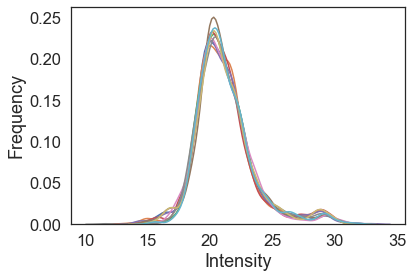

In [8]:
medians = data_log2.apply(lambda series: median(series.dropna()))
global_median = median(medians.dropna())
data_normalized = data_log2.apply(lambda series: series-median(series.dropna())+global_median)
data_normalized.apply(dist)
plt.show()

Here, the data is centered at the global median instead of 0.

#### Normalization reveals biologial grouping

PCA plots to compare the raw and normalized data clustering. This shows the benefit of normalizing to reveal biological differences. Prior to normalization, the batch effects or differences between runs due to differences in number of cells or instrument sensitivity obscure clustering.

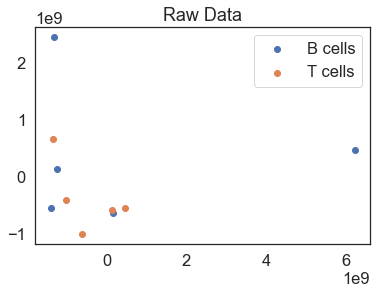

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
from numpy import isnan

import numpy as np
import pandas as pd
sns.set_style("white")


pca = PCA(n_components=5)

alist=data_raw.values.flatten()
alist= [a for a in alist if not isnan(a)]
nan_appoximate = float(alist[math.ceil(float(len(alist))*.01)])
pca_result = pca.fit_transform(np.nan_to_num(data_raw.transpose(), nan=nan_appoximate))

cell_types = ["1_B","1_T"] #Cell types; these strings are in the sample names of those types
samples=np.array(data_raw.columns.values)

for cell_type in cell_types:
    cells_of_type = list(i for i,s in enumerate(samples) if cell_type in s)
    plt.scatter(pca_result[cells_of_type,0],pca_result[cells_of_type,1])
    
plt.title("Raw Data")
plt.legend(['B cells', "T cells"])
plt.show()

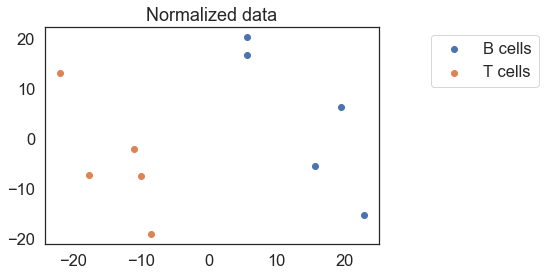

In [13]:
pca = PCA(n_components=5)

alist=data_log2_medNorm.values.flatten()
alist= [a for a in alist if not isnan(a)]
nan_appoximate = float(alist[math.ceil(float(len(alist))*.01)])
pca_result = pca.fit_transform(np.nan_to_num(data_log2_medNorm.transpose(), nan=nan_appoximate))

cell_types = ["1_B","1_T"] #Cell types; these strings are in the sample names of those types
for cell_type in cell_types:
    cells_of_type = list(i for i,s in enumerate(samples) if cell_type in s)
    plt.scatter(pca_result[cells_of_type,0],pca_result[cells_of_type,1])
    
plt.title("Normalized data")
plt.legend(['B cells', "T cells"], loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()